# Sound Processing
##  - Fourier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from scipy import stats

import missingno as msno
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

from matplotlib import font_manager,rc
# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
print(font_name)

Malgun Gothic


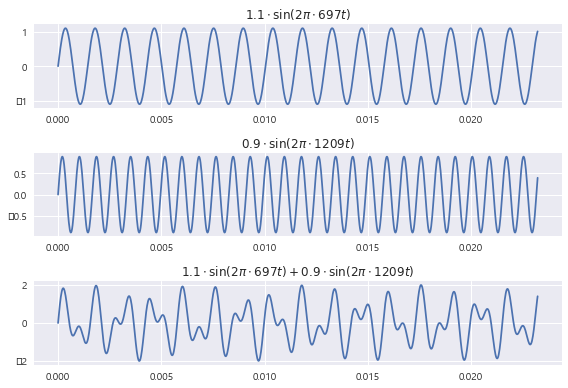

In [2]:
N = 1024
T = 1.0 / 44100.0
f1 = 697
f2 = 1209
t = np.linspace(0.0, N*T, N)
y1 = 1.1 * np.sin(2 * np.pi * f1 * t)
y2 = 0.9 * np.sin(2 * np.pi * f2 * t)
y = y1 + y2

plt.subplot(311)
plt.plot(t, y1)
plt.title(r"$1.1\cdot\sin(2\pi\cdot 697t)$")
plt.subplot(312)
plt.plot(t, y2)
plt.title(r"$0.9\cdot\sin(2\pi\cdot 1209t)$")
plt.subplot(313)
plt.plot(t, y)
plt.title(r"$1.1\cdot\sin(2\pi\cdot 697t) + 0.9\cdot\sin(2\pi\cdot 1209t)$")
plt.tight_layout()
plt.show()

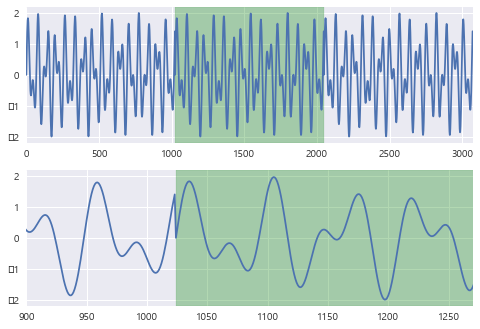

In [3]:
y2 = np.hstack([y, y, y])

plt.subplot(211)
plt.plot(y2)
plt.axvspan(N, N * 2, alpha=0.3, color='green')
plt.xlim(0, 3 * N)

plt.subplot(212)
plt.plot(y2)
plt.axvspan(N, N * 2, alpha=0.3, color='green')
plt.xlim(900, 1270)

plt.show()

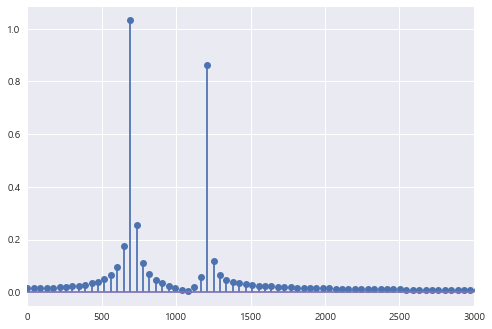

In [4]:
from scipy.fftpack import fft

yf = fft(y, N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.stem(xf, 2.0/N * np.abs(yf[0:N//2])) # stem 은 줄기잎 그림
plt.xlim(0, 3000)

plt.show()

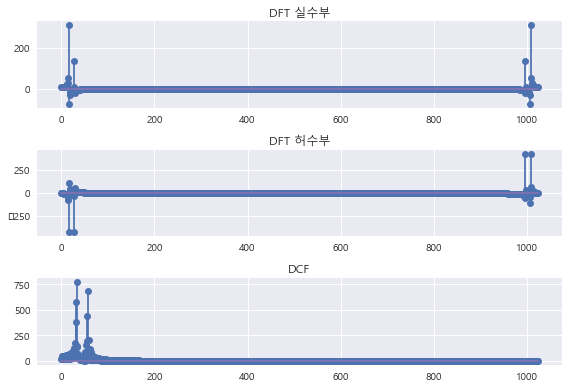

In [5]:
from scipy.fftpack import dct # 2차원 이산 코사인 변환

dct_type = 2 # dct 타입
yf2 = dct(y, dct_type, N) # dct(입력배열, dct타입, N=정수. 선택사항)

plt.subplot(311)
plt.stem(np.real(yf))
plt.title("DFT 실수부")

plt.subplot(312)
plt.stem(np.imag(yf))
plt.title("DFT 허수부")

plt.subplot(313)
plt.stem(np.abs(yf2))
plt.title("DCF")

plt.tight_layout()
plt.show()

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

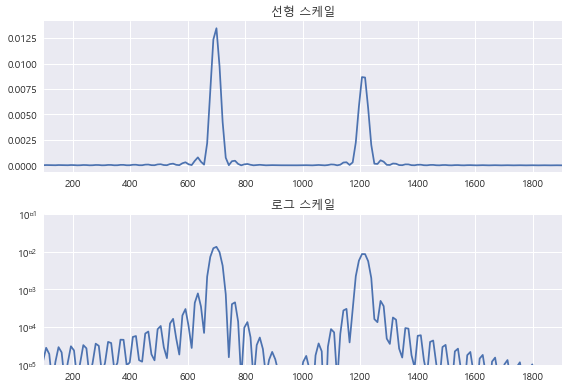

In [10]:
import scipy as sp
import scipy.signal

f, P = sp.signal.periodogram(y, 44100, nfft=2**12)

plt.subplot(211)
plt.plot(f, P)
plt.xlim(100, 1900)
plt.title("선형 스케일")

plt.subplot(212)
plt.semilogy(f, P)
plt.xlim(100, 1900)
plt.ylim(1e-5, 1e-1)
plt.title("로그 스케일")

plt.tight_layout()
plt.show()

## Librosa

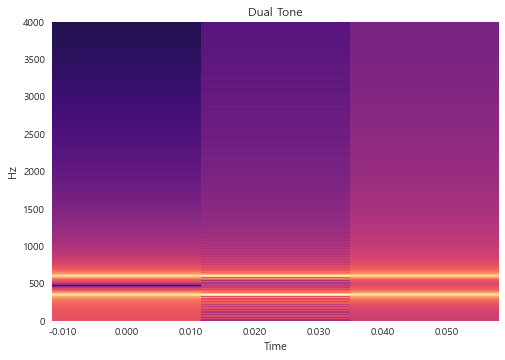

In [14]:
import librosa
import librosa.display

D = np.abs(librosa.stft(y))
librosa.display.specshow(librosa.amplitude_to_db(D, ref = np.max), y_axis = 'linear',x_axis = 'time')
plt.title("Dual Tone")
plt.ylim(0,4000)
plt.show()

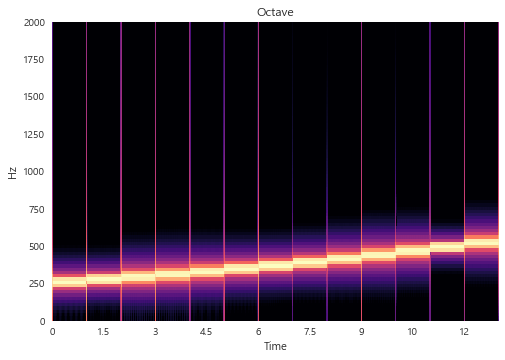

In [23]:
import scipy.io as sio
from scipy.io import wavfile
sr_octave, y_octave = sp.io.wavfile.read("octave.wav")

D_octave = np.abs(librosa.stft(y_octave))
librosa.display.specshow(librosa.amplitude_to_db(D_octave, ref=np.max), sr=sr_octave, y_axis='linear', x_axis='time')
plt.title('Octave')
plt.ylim(0, 2000)
plt.show()

## MFCC

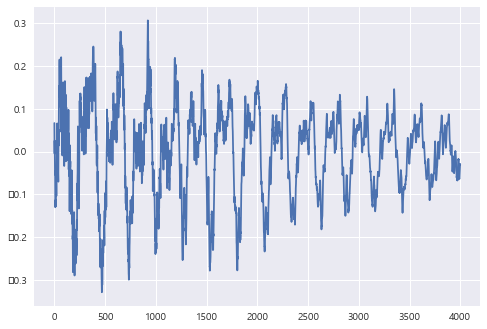

In [48]:
import librosa.util
y, sr = librosa.load(librosa.util.example('vibeace'), offset = 30, duration = 5)

plt.plot(y[1000:5000])
plt.show()

In [49]:
from IPython.display import Audio, display
Audio(y, rate = sr)

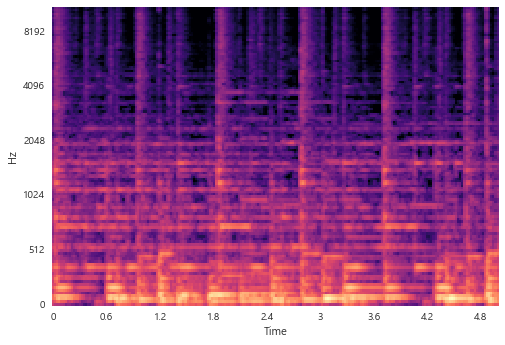

In [50]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax = 8000)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, y_axis = 'mel',
                        x_axis = 'time')
plt.show()

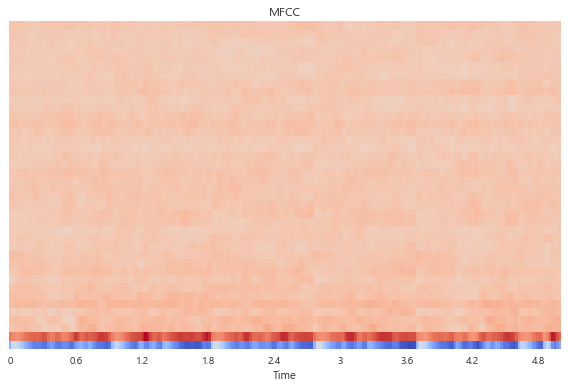

In [51]:
# MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc = 40)
librosa.display.specshow(mfccs, x_axis = 'time')
plt.title("MFCC")
plt.tight_layout()
plt.show()